### Setup

In [14]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from wearsed.dataset.Recording import Recording
from wearsed.training.kfold.load_kfold import get_fold

In [2]:
mesa_ids = []
for fold_nr in range(4):
    _, ts = get_fold('fold-4-somnolyzer', fold_nr, seed=42, path='../wearsed/training/kfold/')
    mesa_ids += ts
len(mesa_ids)

1880

In [4]:
CREATE = False

if CREATE:

    tsts_true, tsts_pred = [], []
    for mesa_id in tqdm(mesa_ids):
        rec = Recording(mesa_id, signals_to_read=[], events_as_list=True, use_predicted_hypnogram=False)
        tsts_true.append(len(rec.hypnogram[rec.hypnogram != 0]) / 60 / 60)
        rec = Recording(mesa_id, signals_to_read=[], events_as_list=True, use_predicted_hypnogram=True)
        tsts_pred.append(len(rec.hypnogram[rec.hypnogram != 0]) / 60 / 60)

    pd.DataFrame({
        'mesa_id': mesa_ids,
        'tst_true': tsts_true,
        'tst_pred': tsts_pred
    }).to_csv('59_tsts.csv', index=False)

if not CREATE:

    df = pd.read_csv('59_tsts.csv')
    tsts_true, tsts_pred = df['tst_true'].values, df['tst_pred'].values

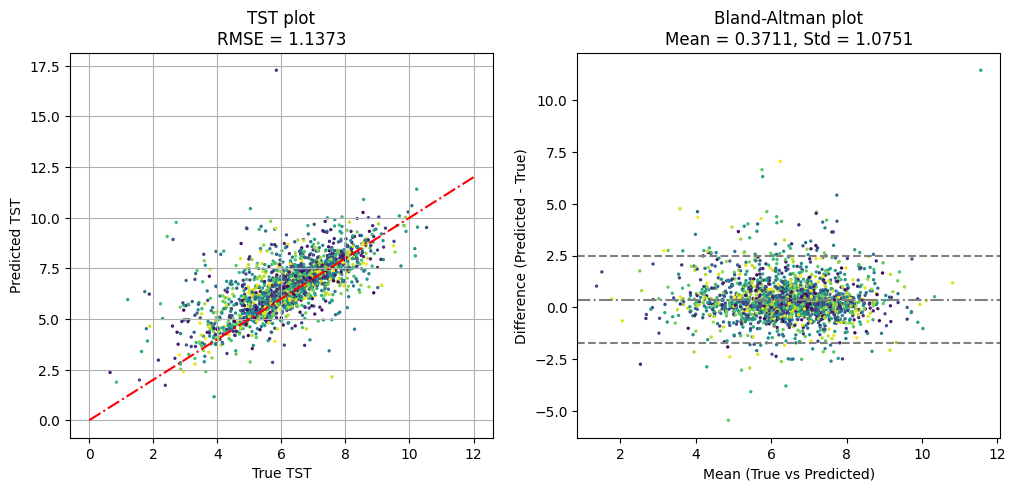

In [13]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(tsts_true, tsts_pred, s=2, c=np.random.rand(len(tsts_true), 1))
ax1.plot([0, 12], [0, 12], 'r-.')
ax1.set_title(f'TST plot\nRMSE = {np.sqrt(((np.array(tsts_pred) - np.array(tsts_true)) ** 2).mean()):.4f}')
ax1.set_xlabel('True TST')
ax1.set_ylabel('Predicted TST')
ax1.grid()

mean = np.mean([tsts_pred, tsts_true], axis=0)
diff = np.array(tsts_pred) - np.array(tsts_true)
diff_mean, diff_std = np.mean(diff), np.std(diff, axis=0)
ax2.scatter(mean, diff, s=2, c=np.random.rand(len(tsts_true), 1))
ax2.axhline(diff_mean,                 color='gray', linestyle='-.')
ax2.axhline(diff_mean + 1.96*diff_std, color='gray', linestyle='--')
ax2.axhline(diff_mean - 1.96*diff_std, color='gray', linestyle='--')
ax2.set_title(f'Bland-Altman plot\nMean = {diff_mean:.4f}, Std = {diff_std:.4f}')
ax2.set_xlabel('Mean (True vs Predicted)')
ax2.set_ylabel('Difference (Predicted - True)')

plt.show()

In [15]:
spearman_corr, spearman_p = spearmanr(tsts_pred, tsts_true)
print(spearman_corr, spearman_p)

0.7119138215339185 1.3913611593258264e-290
